In [203]:
# CMPE 442: Machine Learning
# Homework: 2
# Queestion: 2
# Author: Efe Berk ERGULEC

In [211]:
# Implementing Libraries
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [205]:
""" Functions that I will use during this question. """
def split_dataset(dataset, train_percent):
    train, test = {}, {}
    train_len = int(len(dataset.data) * train_percent)
    test_len = len(dataset.data) - train_len
    for i in dataset.keys():
        if(i == 'DESCR'):
            continue
        if len(dataset[i]) < 100:
            train[i] = dataset[i]
            test[i] = dataset[i]
        else:
            train[i] = []
            test[i] = []
            for j in range(train_len):
                train[i].append(dataset[i][j])
            for j in range(test_len):
                test[i].append(dataset[i][j])
    return train, test

In [206]:
# Picks dataset from sklearn and splits them 
categories=data.target_names
dataset = fetch_20newsgroups(subset='all', categories=categories)

tr_01, te_01 = split_dataset(dataset, 0.1)
tr_03, te_03 = split_dataset(dataset, 0.3)
tr_05, te_05 = split_dataset(dataset, 0.5)
tr_08, te_08 = split_dataset(dataset, 0.8)

train_data = [tr_01, tr_03, tr_05, tr_08]
test_data = [te_01, te_03, te_05, te_08]
percents = ['10', '30', '50', '80']

Accuracy = 75.94% | Execution Time = 7.36 seconds
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.73      0.77       703
           comp.graphics       0.64      0.65      0.64       869
 comp.os.ms-windows.misc       0.76      0.75      0.75       874
comp.sys.ibm.pc.hardware       0.66      0.62      0.64       897
   comp.sys.mac.hardware       0.66      0.76      0.71       882
          comp.windows.x       0.71      0.76      0.73       907
            misc.forsale       0.72      0.81      0.76       875
               rec.autos       0.76      0.75      0.76       883
         rec.motorcycles       0.78      0.86      0.82       906
      rec.sport.baseball       0.81      0.82      0.82       907
        rec.sport.hockey       0.90      0.87      0.88       900
               sci.crypt       0.88      0.88      0.88       880
         sci.electronics       0.66      0.65      0.65       893
                 sci.med 

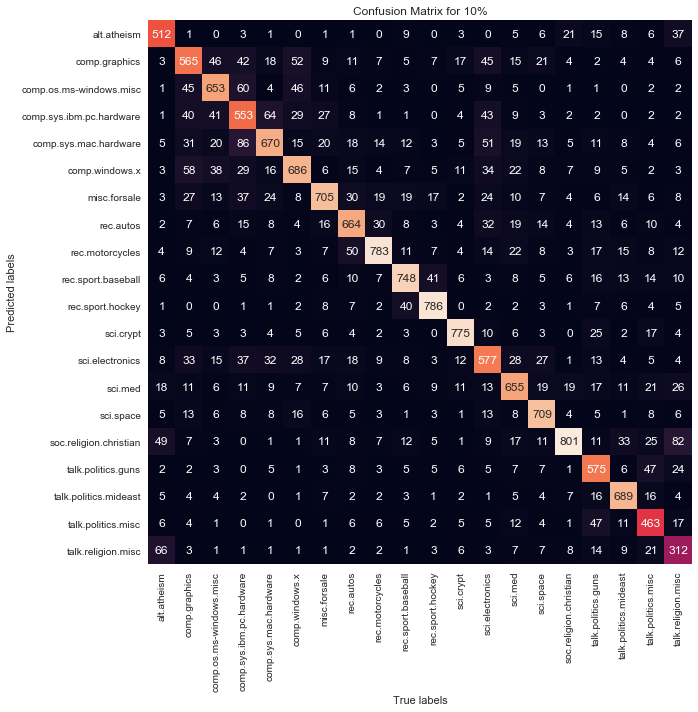

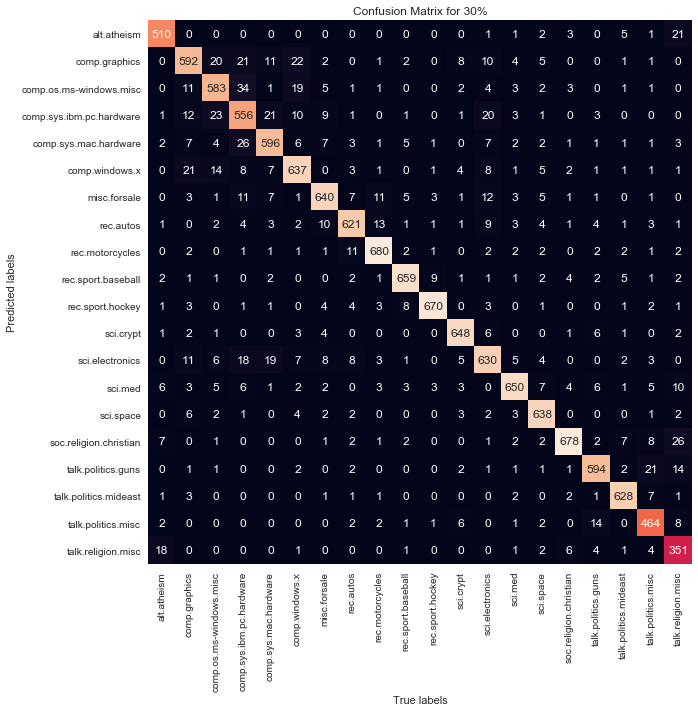

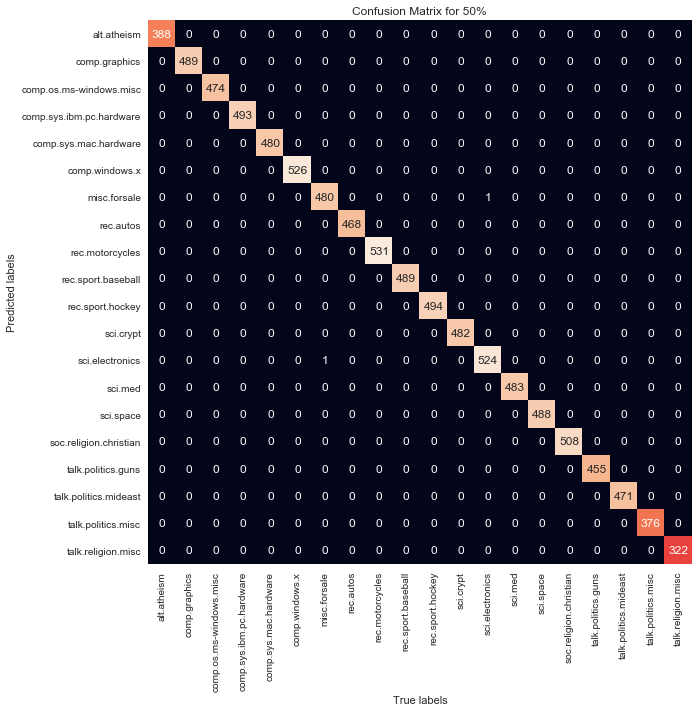

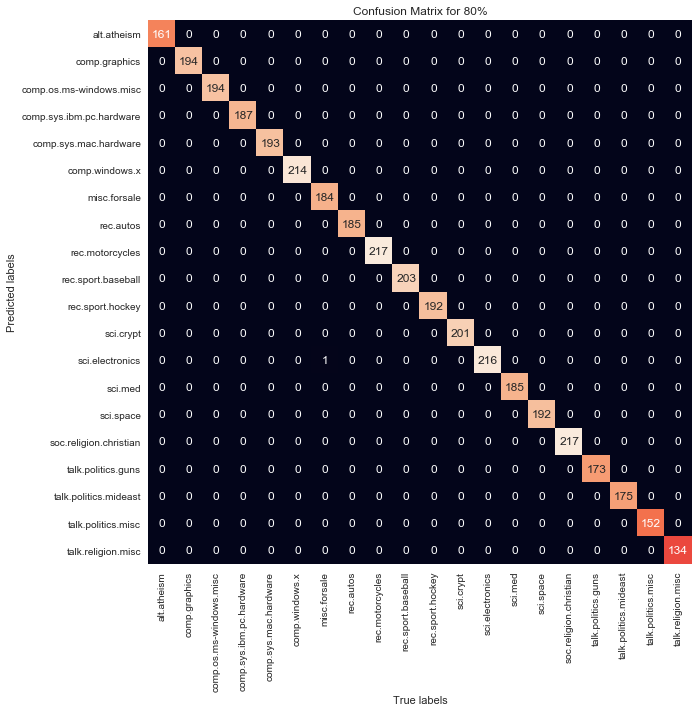

In [215]:
for i in range(4):
    start = time.time()
    # Creates a model based on Multinomial Naive Bayes. You can choose one of these four and you can look at their results.
    # model=make_pipeline(TfidfVectorizer(), MultinomialNB())
    # model=make_pipeline(CountVectorizer(), MultinomialNB())
    # model=make_pipeline(TfidfVectorizer(), LogisticRegression())
    model=make_pipeline(CountVectorizer(), LogisticRegression())
    # Trains the model with the train data
    model.fit(train_data[i]['data'],train_data[i]['target'])
    # Creates labels for the test data
    labels=model.predict(test_data[i]['data'])
    end = time.time()
    # Draws Confusion Matrix
    mat=confusion_matrix(test_data[i]['target'],labels)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
           , xticklabels=train_data[i]['target_names'], ax=ax
           , yticklabels=train_data[i]['target_names'])
    plt.title("Confusion Matrix for {}%".format(percents[i]))
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    print("Accuracy = {}% | Execution Time = {} seconds".format(np.around(accuracy_score(labels, test_data[i]['target']) * 100, decimals=2), np.around(end - start, 2)))
    print(classification_report(test_data[i]['target'], labels,target_names=categories))

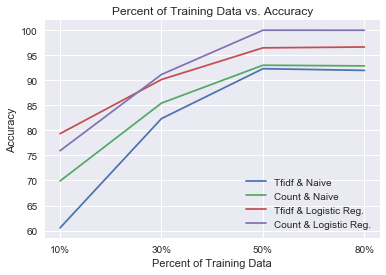

In [218]:
# Draws accuracy table (train data% vs. accuracy)
parameters = ['10%', '30%', '50%', '80%']
tfidf_naive = [60.55, 82.35, 92.30, 91.96]
count_naive = [69.90, 85.44, 92.99, 92.86]
tfidf_logrg = [79.34, 90.14, 96.46, 96.63]
count_logrg = [75.94, 91.15, 99.98, 99.97]

plt.plot(parameters, tfidf_naive, label='Tfidf & Naive')
plt.plot(parameters, count_naive, label='Count & Naive')
plt.plot(parameters, tfidf_logrg, label='Tfidf & Logistic Reg.')
plt.plot(parameters, count_logrg, label='Count & Logistic Reg.')
plt.xlabel('Percent of Training Data')
plt.ylabel('Accuracy')
plt.title('Percent of Training Data vs. Accuracy')
plt.legend()

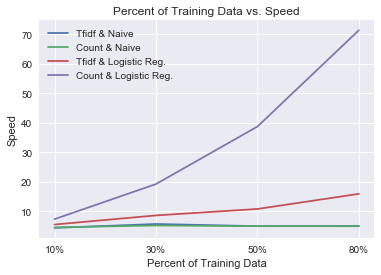

In [219]:
# Draws speed table (train data% vs. speed)
tfidf_naive_t = [4.40, 5.71, 4.98, 5.04]
count_naive_t = [4.56, 5.21, 4.98, 4.96]
tfidf_logrg_t = [5.53, 8.62, 10.81, 15.93]
count_logrg_t = [7.36, 19.25, 38.75, 71.41]

plt.plot(parameters, tfidf_naive_t, label='Tfidf & Naive')
plt.plot(parameters, count_naive_t, label='Count & Naive')
plt.plot(parameters, tfidf_logrg_t, label='Tfidf & Logistic Reg.')
plt.plot(parameters, count_logrg_t, label='Count & Logistic Reg.')
plt.xlabel('Percent of Training Data')
plt.ylabel('Speed')
plt.title('Percent of Training Data vs. Speed')
plt.legend()